In [12]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_ind=df[df['job_country']=='India']

In [3]:
df_skills=df_ind.explode('job_skills')
df_skills[['job_title','job_skills']]
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [4]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])

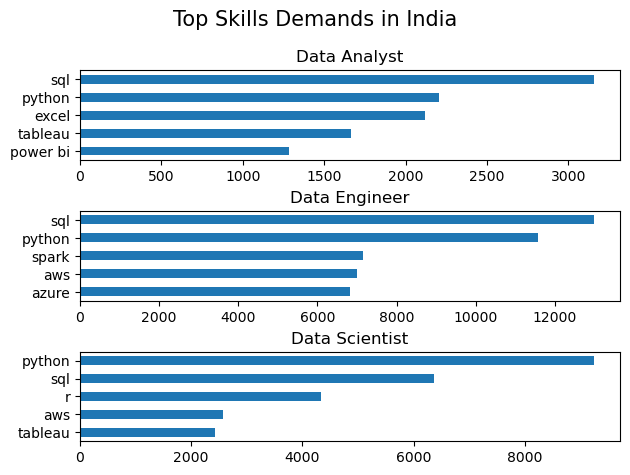

In [5]:
fig,ax=plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Top Skills Demands in India', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [8]:
df_job_title_count=df_ind['job_title_short'].value_counts().reset_index(name='job_total')

In [10]:
df_skills_percent=pd.merge(df_skills_count,df_job_title_count,on='job_title_short',how='left')

df_skills_percent['skill_percent']=df_skills_percent['skill_count']/df_skills_percent['job_total']*100
df_skills_percent

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


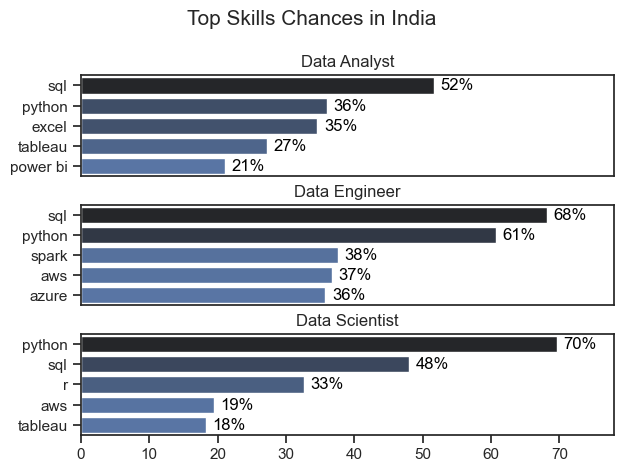

In [24]:
fig,ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot=df_skills_percent[df_skills_percent['job_title_short']==job_title].head(5)
    
    sns.barplot(x='skill_percent',y='job_skills',data=df_plot,ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%', color='black', va='center')
    
    if i!=len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Top Skills Chances in India', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()